In [1]:
cd ../../../..

/Users/jbbutler129/Google Drive (butlerj@berkeley.edu)/Classes/215A/final_project/rule-vetting


In [2]:
%pwd

'/Users/jbbutler129/Google Drive (butlerj@berkeley.edu)/Classes/215A/final_project/rule-vetting'

# Pre-Cleaning/Processing EDA Analysis

In [4]:
# %load_ext autoreload
# %autoreload 2

# import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#IMPORTANT: REPLACE WITH YOUR PATH TO THE RULE-VETTING GITHUB
# repo_path = '/users/jbbutler129/Google Drive (butlerj@berkeley.edu)/Classes/215A/final_project/rule-vetting/'

# sys.path.insert(1, repo_path)

import rulevetting.api.viz as viz
from rulevetting.projects.tbi_pecarn.dataset import Dataset

outcome_def = 'outcome'  # output
# %matplotlib inline
# %load_ext autoreload
# %autoreload 2


/opt/anaconda3/lib/python3.8/site-packages/redis/connection.py:77: UserWarning: redis-py works best with hiredis. Please consider installing
  warnings.warn(msg)


# Loading the TBI Data

In [ ]:
#TODO: make Dataset.get_data work

In [ ]:
# couldn't figure out how to do this, so I'm going to just load up the csvs on my own

#path = '/users/jbbutler129/Google Drive (butlerj@berkeley.edu)/Classes/215A/rule-vetting/rulevetting/projects/tbi_pecarn'
# df_train, df_tune, _ = Dataset().get_data(load_csvs=True)



In [5]:
# this is me loading up the main CSV on my own
tbi_df = pd.read_csv("data/tbi_pecarn/raw/TBI PUD 10-08-2013.csv")

In [7]:
len(tbi_df.keys())

125

## 11/16 Notes/Plots

### Note that in this data, there are 43339 evaluable patients, meaning in Figure 1 of the paper, we are at the part of the flowchart where we haven't yet removed patients with GCS scores 3 - 13, and haven't removed the patients missing the binary outcome

# Feature Examination

Looking at the features, we see many variables a probably have nothing to do with TBIs
(employee type, certification, etc.)
Some of these also have overlapping information, so let's try to get a subset of these predictors and then look at the correlations


In [5]:
features = tbi_df.keys().tolist()
features

['PatNum',
 'EmplType',
 'Certification',
 'InjuryMech',
 'High_impact_InjSev',
 'Amnesia_verb',
 'LOCSeparate',
 'LocLen',
 'Seiz',
 'SeizOccur',
 'SeizLen',
 'ActNorm',
 'HA_verb',
 'HASeverity',
 'HAStart',
 'Vomit',
 'VomitNbr',
 'VomitStart',
 'VomitLast',
 'Dizzy',
 'Intubated',
 'Paralyzed',
 'Sedated',
 'GCSEye',
 'GCSVerbal',
 'GCSMotor',
 'GCSTotal',
 'GCSGroup',
 'AMS',
 'AMSAgitated',
 'AMSSleep',
 'AMSSlow',
 'AMSRepeat',
 'AMSOth',
 'SFxPalp',
 'SFxPalpDepress',
 'FontBulg',
 'SFxBas',
 'SFxBasHem',
 'SFxBasOto',
 'SFxBasPer',
 'SFxBasRet',
 'SFxBasRhi',
 'Hema',
 'HemaLoc',
 'HemaSize',
 'Clav',
 'ClavFace',
 'ClavNeck',
 'ClavFro',
 'ClavOcc',
 'ClavPar',
 'ClavTem',
 'NeuroD',
 'NeuroDMotor',
 'NeuroDSensory',
 'NeuroDCranial',
 'NeuroDReflex',
 'NeuroDOth',
 'OSI',
 'OSIExtremity',
 'OSICut',
 'OSICspine',
 'OSIFlank',
 'OSIAbdomen',
 'OSIPelvis',
 'OSIOth',
 'Drugs',
 'CTForm1',
 'IndAge',
 'IndAmnesia',
 'IndAMS',
 'IndClinSFx',
 'IndHA',
 'IndHema',
 'IndLOC',
 'In

This is me removing all of the traumatic finding variables/extraneous variables that indicate a TBI by definition

In [6]:
cols_rem = tbi_df.drop(tbi_df.columns[list(np.arange(98, 124)) + [1,2]], axis = 1)

In [7]:
tbi_df.columns[list(np.arange(98, 124)) + [1,2]]

Index(['CTDone', 'EDCT', 'PosCT', 'Finding1', 'Finding2', 'Finding3',
       'Finding4', 'Finding5', 'Finding6', 'Finding7', 'Finding8', 'Finding9',
       'Finding10', 'Finding11', 'Finding12', 'Finding13', 'Finding14',
       'Finding20', 'Finding21', 'Finding22', 'Finding23', 'DeathTBI',
       'HospHead', 'HospHeadPosCT', 'Intub24Head', 'Neurosurgery', 'EmplType',
       'Certification'],
      dtype='object')

In [8]:
cols_rem.columns

Index(['PatNum', 'InjuryMech', 'High_impact_InjSev', 'Amnesia_verb',
       'LOCSeparate', 'LocLen', 'Seiz', 'SeizOccur', 'SeizLen', 'ActNorm',
       'HA_verb', 'HASeverity', 'HAStart', 'Vomit', 'VomitNbr', 'VomitStart',
       'VomitLast', 'Dizzy', 'Intubated', 'Paralyzed', 'Sedated', 'GCSEye',
       'GCSVerbal', 'GCSMotor', 'GCSTotal', 'GCSGroup', 'AMS', 'AMSAgitated',
       'AMSSleep', 'AMSSlow', 'AMSRepeat', 'AMSOth', 'SFxPalp',
       'SFxPalpDepress', 'FontBulg', 'SFxBas', 'SFxBasHem', 'SFxBasOto',
       'SFxBasPer', 'SFxBasRet', 'SFxBasRhi', 'Hema', 'HemaLoc', 'HemaSize',
       'Clav', 'ClavFace', 'ClavNeck', 'ClavFro', 'ClavOcc', 'ClavPar',
       'ClavTem', 'NeuroD', 'NeuroDMotor', 'NeuroDSensory', 'NeuroDCranial',
       'NeuroDReflex', 'NeuroDOth', 'OSI', 'OSIExtremity', 'OSICut',
       'OSICspine', 'OSIFlank', 'OSIAbdomen', 'OSIPelvis', 'OSIOth', 'Drugs',
       'CTForm1', 'IndAge', 'IndAmnesia', 'IndAMS', 'IndClinSFx', 'IndHA',
       'IndHema', 'IndLOC', 'IndMech', 

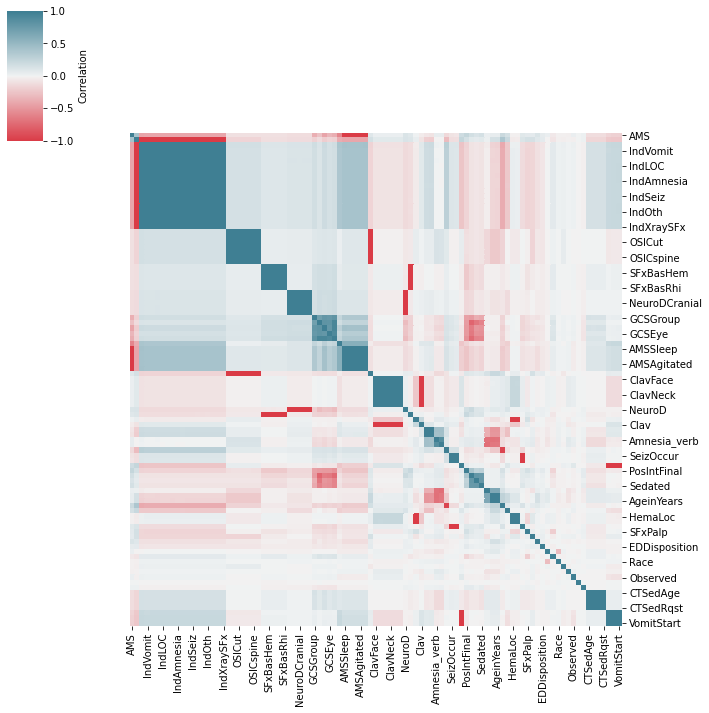

In [9]:
corrmap = sns.clustermap(cols_rem.corr(), cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
corrmap.ax_row_dendrogram.set_visible(False)
corrmap.ax_col_dendrogram.set_visible(False)


Seems like I might want to also remove all of the 'IND' variables, since those don't really indicate anything about whether or not you're going to have a TBI (reasons why you're ordering a CT scan), not really helpful for our problem because we're making classifiers to make sure individuals don't get unnecessary CT scans: an individual classified using our classifier will not have had a CT scan yet, so we wouldn't have that data anyway

In [10]:
# making a list of variables to remove
list_to_rem = []

for name in cols_rem.keys().tolist():
    
    if 'Ind' in name or 'CT' in name:
        list_to_rem.append(name)



In [11]:
# these are the variables I'm removing, since these aren't super helpful for our purposes
list_to_rem

['CTForm1',
 'IndAge',
 'IndAmnesia',
 'IndAMS',
 'IndClinSFx',
 'IndHA',
 'IndHema',
 'IndLOC',
 'IndMech',
 'IndNeuroD',
 'IndRqstMD',
 'IndRqstParent',
 'IndRqstTrauma',
 'IndSeiz',
 'IndVomit',
 'IndXraySFx',
 'IndOth',
 'CTSed',
 'CTSedAgitate',
 'CTSedAge',
 'CTSedRqst',
 'CTSedOth']

Let's take these columns and remove them!

In [12]:
cols_rem2 = cols_rem.drop(list_to_rem, axis = 1)

Now, let's replot and see what we get!

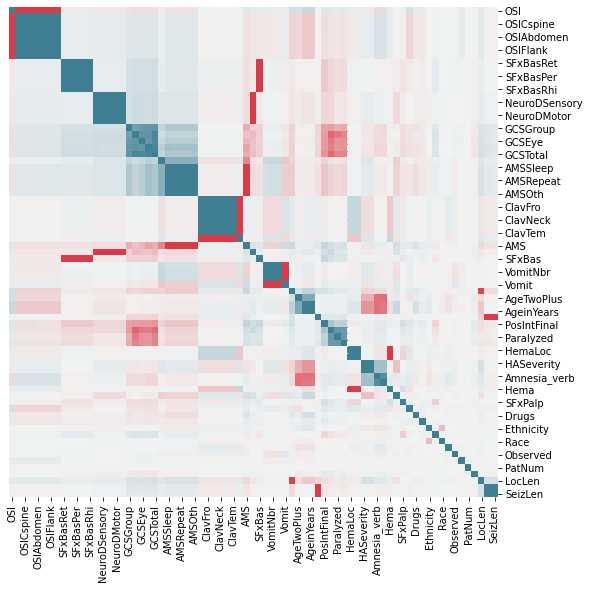

In [14]:
name = 'corrmap.png'
corrmap = sns.clustermap(cols_rem2.corr(), cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
corrmap.ax_row_dendrogram.set_visible(False)
corrmap.ax_col_dendrogram.set_visible(False)
corrmap.cax.set_visible(False)
#plt.savefig(repo_path + '/rulevetting/projects/tbi_pecarn/notebooks/figs/' + name, dpi = 300)

Text(0.5, 1.0, 'Correlations of Each Predictor with Outcome (ciTBI, Kuppermann definition)')

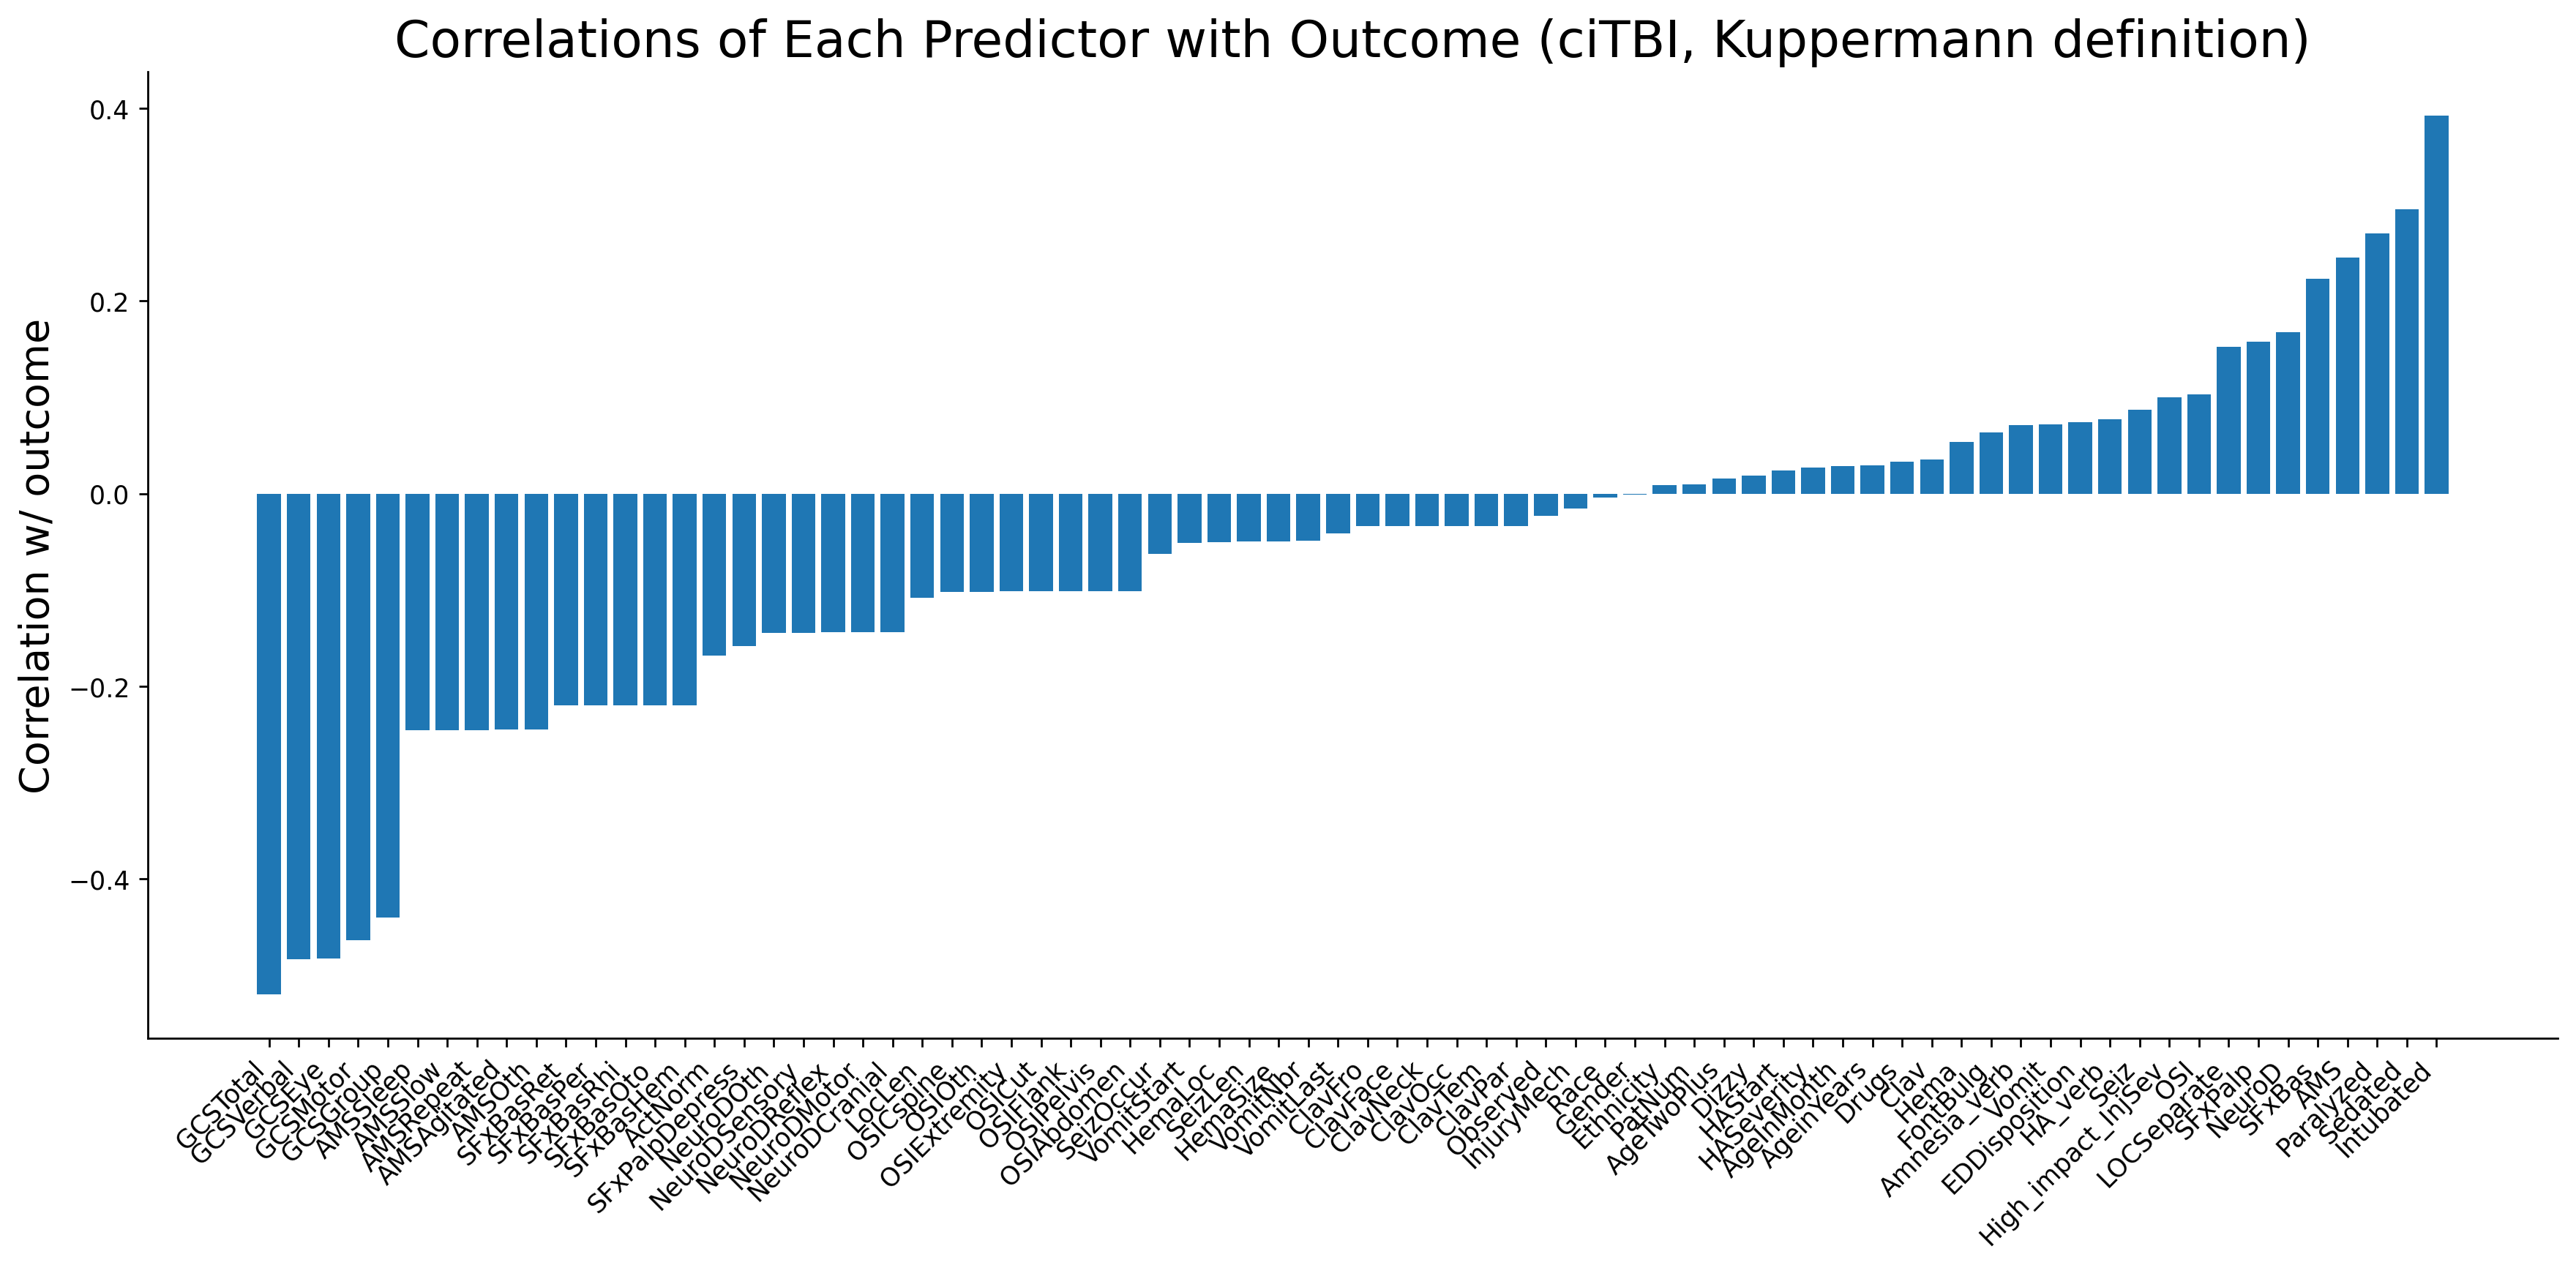

In [15]:
name = 'corr_outcomes.png'

corrs = cols_rem2.corr()

plt.figure(dpi=250, figsize=(17, 7))
vals = corrs['PosIntFinal']
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.bar(labs[:-1], vals[args][:-1])
plt.ylabel('Correlation w/ outcome', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
plt.title('Correlations of Each Predictor with Outcome (ciTBI, Kuppermann definition)', fontsize = 20)
#plt.savefig("rulevetting/projects/tbi_pecarn/notebooks/figs/" + name, dpi = 300)

It seems like the GCS Scores are highly correlated with the outcome (whether or not you have a defined TBI), Correlation does not mean causation!

Replacing the 92 values with NaN's, because I realized that this might mess up the correlation (a lot of missing values between two columns could make the correlation artificially high)

In [16]:
no_92 = cols_rem2.replace(92, np.nan)

In [17]:
no_92

,PatNum,InjuryMech,High_impact_InjSev,Amnesia_verb,LOCSeparate,LocLen,Seiz,SeizOccur,SeizLen,ActNorm,...,Drugs,AgeInMonth,AgeinYears,AgeTwoPlus,Gender,Ethnicity,Race,Observed,EDDisposition,PosIntFinal
0,1.0,11.0,2.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,...,0.0,197.0,16,2,1.0,2.0,2.0,0.0,1.0,0.0
1,2.0,8.0,2.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,...,0.0,64.0,5,2,2.0,2.0,1.0,0.0,1.0,0.0
2,3.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,170.0,14,2,1.0,NaN,1.0,0.0,5.0,0.0
3,4.0,6.0,1.0,91.0,0.0,NaN,0.0,NaN,NaN,1.0,...,0.0,13.0,1,1,2.0,2.0,2.0,0.0,1.0,0.0
4,5.0,12.0,2.0,91.0,0.0,NaN,0.0,NaN,NaN,0.0,...,0.0,14.0,1,1,1.0,2.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43394,43395.0,8.0,2.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,...,0.0,53.0,4,2,1.0,2.0,2.0,0.0,1.0,0.0
43395,43396.0,6.0,1.0,91.0,0.0,NaN,0.0,NaN,NaN,1.0,...,0.0,55.0,4,2,1.0,2.0,2.0,0.0,1.0,0.0
43396,43397.0,7.0,1.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,...,0.0,61.0,5,2,1.0,2.0,2.0,0.0,1.0,0.0
43397,43398.0,8.0,2.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,...,0.0,64.0,5,2,1.0,2.0,1.0,1.0,1.0,0.0


In [18]:
corr = no_92.corr();

pd.isna(corr)

,PatNum,InjuryMech,High_impact_InjSev,Amnesia_verb,LOCSeparate,LocLen,Seiz,SeizOccur,SeizLen,ActNorm,...,Drugs,AgeInMonth,AgeinYears,AgeTwoPlus,Gender,Ethnicity,Race,Observed,EDDisposition,PosIntFinal
PatNum,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
InjuryMech,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
High_impact_InjSev,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Amnesia_verb,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
LOCSeparate,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ethnicity,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Race,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Observed,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
EDDisposition,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Andrej**: cannot do dendrogram linkage if NaNs.

ValueError: The condensed distance matrix must contain only finite values.

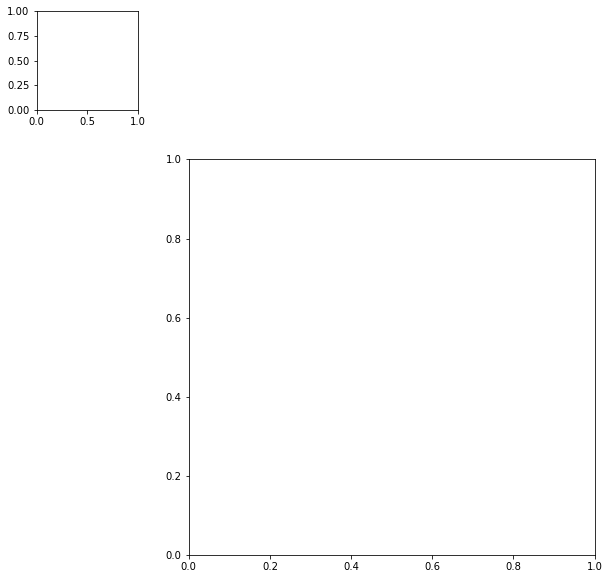

In [19]:
# replotting

name = 'corrmap.png'
corrmap = sns.clustermap(no_92.corr(), cmap=viz.cmap_div, vmin=-1, vmax=1,
                         method="single",
                         cbar_kws={'label': 'Correlation'})

In [20]:
corrmap.ax_row_dendrogram.set_visible(False)
corrmap.ax_col_dendrogram.set_visible(False)
corrmap.cax.set_visible(False)
#plt.savefig(repo_path + '/rulevetting/projects/tbi_pecarn/notebooks/figs/' + name, dpi = 300)

In [21]:
sum(np.isnan(np.array(no_92['OSIAbdomen'])))/len(no_92['OSIAbdomen'])

0.8947671605336528

# *Below This Line is Data Cleaning Notes, not EDA*

## 11/22 Notes/Plots

Here are some heplful functions to make contingency tables of variables and plots of missing values for iterations of the cleaned dataset

In [ ]:
def make_missing_plot(df):
    
    col_dict = {}

    for col in list(df):
    
        col_dict[col] = sum(np.isnan(np.array(df[col])))/len(df)

    col_names = list(col_dict.keys())
    proportions = list(col_dict.values())

    name = 'nan_props.png'

    plt.figure(dpi=250, figsize=(17, 7))
    plt.bar(col_names, proportions)
    plt.ylabel('proportion', fontsize = 16)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
    plt.title('Proportion of NaN for each Variable (no response)', fontsize = 20)
    
def make_missing_contingency(df, varlist):

    subset = df[varlist]
    subset = subset.fillna('missing')
    
    first_col = subset[varlist[0]]
    other_cols = []
    
    for col in list(subset.drop(varlist[0], axis = 1)):
        other_cols.append(subset[col])

    table = pd.crosstab(first_col, other_cols, dropna = False)
    
    return table


First off, only 376 confirmed clinically important TBIs?

**Andrej**: need to define `tbi_df_step2`, taking the same initial one?

In [ ]:
tbi_df_step2 = pd.read_csv("data/tbi_pecarn/raw/TBI PUD 10-08-2013.csv")

In [ ]:
# finding number of TBIs
np.sum(tbi_df_step2['PosIntFinal'])

Not really huge differences in the rates at which different certifications and different employee types end up having evaluated someone with a TBI. Only time this would make a difference would be if certain certifications/employee types systematically answer fill out these sheets differently, so if we have less of one employee represented and we use this on future data where that employee type happened to fill out the sheet, we would be using the algorithm on out of distribution data. However, no indication that these questions would be systematically answered differently by any type or certification (a lot of them are objective/anyone with qualifications would be able to do it, also domain expert says not a big deal)

In [ ]:
# finding the proportions of diagnoses to see if there are differences among certifications
# employee types

for cert in tbi_df_step2.Certification.unique():
    subset = tbi_df_step2[tbi_df_step2['Certification'] == cert]
        
    prop_pos = sum(subset['PosIntFinal'])/len(subset)
    prop_neg = 1 - prop_pos

    print([prop_pos, prop_neg])

In [ ]:
for typ in tbi_df_step2.EmplType.unique():
    subset = tbi_df_step2[tbi_df_step2['EmplType'] == typ]
        
    prop_pos = sum(subset['PosIntFinal'])/len(subset)
    prop_neg = 1 - prop_pos

    print([prop_pos, prop_neg])

In [ ]:
# how many observations had a null employee type, but they all certifications anyway/reasonable values throughout
# so let's keep
len(tbi_df_step2[tbi_df_step2['EmplType'].isnull()])

Doing a three way contingency table to see how missingness looks for these three variables. Maybe can impute? But it seems like there are 310 missing values that have all three missing, 15 that have one or another missing (but not all three)

In [ ]:
# Step 3: pharmacologically paralyzed, intubated, or sedated: how many Nans are there among these? Because we certainly
# don't want individuals who we aren't sure were intubated, paralyzed, or sedated...

pis = tbi_df_step2[['PatNum', 'Sedated', 'Paralyzed', 'Intubated']]
pis = pis.fillna('missing')

pd.crosstab(pis.Intubated, [pis.Paralyzed, pis.Sedated], dropna = False)


In [ ]:
pats_missing_all = pis[(pis['Sedated'] == 'missing') | (pis['Paralyzed'] == 'missing') | (pis['Intubated'] == 'missing')].PatNum



In [ ]:
missing_patients = tbi_df_step2.loc[pats_missing_all.index]

In [ ]:
# people who were able to respond if they have amnesia are not considered to be intubated, paralyzed, etc.
indices_no = missing_patients[missing_patients['Amnesia_verb'] == 0].index
indices_yes = missing_patients[missing_patients['Amnesia_verb'] == 1].index

In [ ]:
tbi_df_step2[['Sedated', 'Paralyzed', 'Intubated']].loc[indices_no].fillna(1)
#tbi_df_step3 = tbi_df_step3[['Sedated', 'Paralyzed', 'Intubated']].loc[indices_yes].fillna(1)

In [ ]:
pis = tbi_df_step2[['PatNum', 'Sedated', 'Paralyzed', 'Intubated']]
pis = pis.fillna('missing')

pd.crosstab(pis.Intubated, [pis.Paralyzed, pis.Sedated], dropna = False)

### Missing Value Analysis

In [ ]:
# find out what proportion of each column in the nan-filled dataset are nan:
col_dict = {}

for col in list(tbi_df_step1):
    
    col_dict[col] = sum(np.isnan(np.array(tbi_df_step1[col])))/len(tbi_df_step1)

col_names = list(col_dict.keys())
proportions = list(col_dict.values())

name = 'nan_props.png'

plt.figure(dpi=250, figsize=(17, 7))
plt.bar(col_names, proportions)
plt.ylabel('proportion', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
plt.title('Proportion of NaN for each Variable (no response)', fontsize = 20)
#plt.savefig(repo_path + '/rulevetting/projects/tbi_pecarn/notebooks/figs/' + name, dpi = 300)

In [ ]:
no_high_missing = tbi_df_step1.drop(['Dizzy', 'Ethnicity'], axis = 1)

col_dict = {}

for col in list(no_high_missing):
    
    col_dict[col] = sum(np.isnan(np.array(no_high_missing[col])))/len(no_high_missing)

col_names = list(col_dict.keys())
proportions = list(col_dict.values())

name = 'nan_props.png'

plt.figure(dpi=250, figsize=(17, 7))
plt.bar(col_names, proportions)
plt.ylabel('proportion', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
plt.title('Proportion of NaN for each Variable (no response)', fontsize = 20)

Once we remove those columns, this is what the missing value situation looks like. Note that there are no missing GCS scores at all (total scores), so let's just subset with respect to these, and keep working with the missing value problem.

Comments: This is the proportion of NaN observations for each variable (without recoding the '92' variable values yet, since these observations could either be missing or not). But, seems like Dizzy has a lot of missing values (and is not a really good indicator of anything because the doctor said so, so we can probably drop this column). Also probably going to drop ethnicity since almost half of the observations do not have ethnicity information, and cannot impute any values for it (should not drop these observations). Doesn't make sense to have it as a predictor, subset observations by (or get rid of missing values by), or have it for posthoc analysis. So, we'll just throw this column out. Same with dizziness: not a good predictor by expert opinion, doesn't make sense to subset or get rid of observations for having missing values since there are so many missing relative to other more interesting columns, and doesn't make sense to do a posthoc EDA. Also super subjective and has poor reliability, so it doesn't make sense to include this anywhere.

After subsetting wrt to GCS and whether they have the final outcome observed, see what other outcomes relevant for the other response variable we want to make have missingness.

In [ ]:
sum(tbi_df_step3['DeathTBI'].isnull())

In [ ]:
sum(tbi_df_step3['Intub24Head'].isnull())

In [ ]:
sum(tbi_df_step3['Neurosurgery'].isnull())

In [ ]:
sset = tbi_df_step3[['DeathTBI', 'Intub24Head', 'Neurosurgery', 'HospHead', 'PosIntFinal']]
bigsset = tbi_df_step3[['DeathTBI', 'Intub24Head', 'Neurosurgery', 'PosIntFinal', 'HospHead']]
bigsset[sset.isnull().any(axis = 1)]

**Andrej**: Shouldn't we just impute PosIntFinal from the presence *any* of these? In the article it seems as any of these qualify as ciTBI, why should we trust their data preprocessing?

Comments: remove any observation that has a NaN that is not already PosIntFinal, since PosIntFinal was used to make this variable. Then for any missing values in PosIntFinal, impute a 0. Justification: PosIntFinal was a variable they made based on this data, but if there is a missing component to making PosIntFinal, we cannot justify giving it a value, so drop!

In [ ]:
new_df = tbi_df_step3.dropna(subset = ['DeathTBI', 'Intub24Head', 'Neurosurgery', 'HospHead'])


In [ ]:
sset = new_df[['DeathTBI', 'Intub24Head', 'Neurosurgery', 'HospHead', 'PosIntFinal']]
bigsset = new_df[['DeathTBI', 'Intub24Head', 'Neurosurgery', 'PosIntFinal', 'HospHead']]
bigsset[sset.isnull().any(axis = 1)]


In [ ]:
new_df['PosIntFinal'].fillna(0, inplace = True)

In [ ]:
sset = new_df[['DeathTBI', 'Intub24Head', 'Neurosurgery', 'HospHead', 'PosIntFinal']]
bigsset = new_df[['DeathTBI', 'Intub24Head', 'Neurosurgery', 'PosIntFinal', 'HospHead']]
bigsset[sset.isnull().any(axis = 1)]



Missing value problem has been solved! Now, add the extra response column excluding hospitalization status

In [ ]:
sset = new_df[['DeathTBI', 'Intub24Head', 'Neurosurgery']]
new_outcome = np.zeros(len(new_df))
new_outcome[np.sum(np.array(sset), 1) > 0] = 1

Done! Now, continuing to explore missing values, want to see about the GCS scores

In [ ]:
pis = tbi_df_step5[['GCSEye', 'GCSVerbal', 'GCSMotor']]
pis = pis[tbi_df_step5['GCSTotal'] == 15]
pis = pis.fillna('missing')

pd.crosstab(pis.GCSEye, [pis.GCSVerbal, pis.GCSMotor], dropna = False)

In [ ]:
pis = tbi_df_step5[['GCSEye', 'GCSVerbal', 'GCSMotor']]
pis = pis[tbi_df_step5['GCSTotal'] == 14]
pis = pis.fillna('missing')

pd.crosstab(pis.GCSEye, [pis.GCSVerbal, pis.GCSMotor], dropna = False)

Seems like of the GCS = 14 scores, only 19 of them are missing all three, and about 23 observations are missing at least one value. But this is out of 1200 observations, so we can just get rid of these, probably not going to hurt us (judgment call!)

Then, impute the missing values among GCS = 15 scores to just be the full points.

In [ ]:
tbi_df_step6 = tbi_df_step5.copy()
tbi_df_step6.loc[(tbi_df_step6['GCSTotal'] == 15) & tbi_df_step6['GCSVerbal'].isnull(), 'GCSVerbal'] = 5
tbi_df_step6.loc[(tbi_df_step6['GCSTotal'] == 15) & tbi_df_step6['GCSMotor'].isnull(), 'GCSMotor'] = 6
tbi_df_step6.loc[(tbi_df_step6['GCSTotal'] == 15) & tbi_df_step6['GCSEye'].isnull(), 'GCSEye'] = 4

In [ ]:
pis = tbi_df_step6[['GCSEye', 'GCSVerbal', 'GCSMotor']]
pis = pis[tbi_df_step6['GCSTotal'] == 15]
pis = pis.fillna('missing')

pd.crosstab(pis.GCSEye, [pis.GCSVerbal, pis.GCSMotor], dropna = False)

Interesting, still seems like there's a few wonky observations (like GCS score was 15, but they had lower than optimal scores in some of the individual categories, so what I will do is just drop those observations). Judgment call!

In [ ]:
tbi_df_step6.drop(tbi_df_step6[(tbi_df_step6['GCSTotal'] == 15) & ((tbi_df_step6['GCSVerbal'] < 5) | (tbi_df_step6['GCSMotor'] < 6) | (tbi_df_step6['GCSEye'] < 4))].index, inplace = True)



Cool! Looks like we got rid of all of those wonky observations (there was only a few, but yay imputation!) Now, do the same for the observations for GCS = 14 (get rid of all of those observations that have at least one missing value)

In [ ]:
tbi_df_step6.drop(tbi_df_step6[(tbi_df_step6['GCSTotal'] == 14) & ((tbi_df_step6['GCSVerbal'].isnull()) | (tbi_df_step6['GCSMotor'].isnull()) | (tbi_df_step6['GCSEye'].isnull()))].index, inplace = True)


In [ ]:
pis = tbi_df_step6[['GCSEye', 'GCSVerbal', 'GCSMotor']]
pis = pis[tbi_df_step6['GCSTotal'] == 14]
pis = pis.fillna('missing')

pd.crosstab(pis.GCSEye, [pis.GCSVerbal, pis.GCSMotor], dropna = False)

That seems to have mostly solved it, but there is still one big issue: one observation has full 15 score, but is labelled as 14. Drop it!

In [ ]:
tbi_df_step6.drop(tbi_df_step6[(tbi_df_step6['GCSTotal'] == 14) & ((tbi_df_step6['GCSVerbal'] == 5) & (tbi_df_step6['GCSMotor'] == 6) & (tbi_df_step6['GCSEye'] == 4))].index, inplace = True)



In [ ]:
pis = tbi_df_step6[['GCSEye', 'GCSVerbal', 'GCSMotor']]
pis = pis[tbi_df_step6['GCSTotal'] == 14]
pis = pis.fillna('missing')

pd.crosstab(pis.GCSEye, [pis.GCSVerbal, pis.GCSMotor], dropna = False)

Great! Now, lets look at the situation of missing values again:

In [ ]:
col_dict = {}

for col in list(tbi_df_step6):
    
    col_dict[col] = sum(np.isnan(np.array(tbi_df_step6[col])))/len(tbi_df_step6)

col_names = list(col_dict.keys())
proportions = list(col_dict.values())

name = 'nan_props.png'

plt.figure(dpi=250, figsize=(17, 7))
plt.bar(col_names, proportions)
plt.ylabel('proportion', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
plt.title('Proportion of NaN for each Variable (no response)', fontsize = 20)

Now let's attack the Paralyzed, Sedated, Intubated missingness

In [ ]:
pis = tbi_df_step6[['PatNum', 'Sedated', 'Paralyzed', 'Intubated']]
pis = pis.fillna('missing')

pd.crosstab(pis.Intubated, [pis.Paralyzed, pis.Sedated], dropna = False)

Looks like a lot of missing values. Let's just get rid of any observation that has a 1 in it (a little too intense for us, and also remove the rest because we can't particularly tell whether they were paralyzed sedated or not. JUDGMENT CALL! Could also keep these in and see if the results change.

In [ ]:
tbi_df_step7 = tbi_df_step6.copy()

tbi_df_step7.drop(tbi_df_step7.loc[(tbi_df_step7['Paralyzed'] == 1) | (tbi_df_step7['Sedated'] == 1) | (tbi_df_step7['Intubated'] == 1)].index, inplace = True)
tbi_df_step7.drop(tbi_df_step7.loc[(tbi_df_step7['Paralyzed'].isnull()) | (tbi_df_step7['Sedated'].isnull()) | (tbi_df_step7['Intubated'].isnull())].index, inplace = True)
tbi_df_step7.drop(['Sedated', 'Paralyzed', 'Intubated'], axis = 1, inplace = True)


In [ ]:
col_dict = {}

for col in list(tbi_df_step7):
    
    col_dict[col] = sum(np.isnan(np.array(tbi_df_step7[col])))/len(tbi_df_step7)

col_names = list(col_dict.keys())
proportions = list(col_dict.values())

name = 'nan_props.png'

plt.figure(dpi=250, figsize=(17, 7))
plt.bar(col_names, proportions)
plt.ylabel('proportion', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
plt.title('Proportion of NaN for each Variable (no response)', fontsize = 20)

Now, lets attack AMS. 

In [ ]:
tbi_df_step8 = tbi_df_step7.copy()

pis = tbi_df_step8[['AMS', 'AMSAgitated', 'AMSSleep', 'AMSSlow', 'AMSRepeat']]
pis = pis.fillna('missing')

pd.crosstab(pis.AMS, [pis.AMSAgitated, pis.AMSSleep, pis.AMSSlow, pis.AMSRepeat], dropna = False)


Seems like from this that all of the missing AMS observations are actually missing for all of the other variables as well (subvariables, all have label 92 indicating a missing value or no AMS). So, let's drop these observations since AMS is an important predictor and we don't want to bastardize this for our classifier (also only ~300 observations, not the biggest deal)

In [ ]:
tbi_df_step8.drop(tbi_df_step8.loc[tbi_df_step8['AMS'].isnull()].index, inplace = True)

In [ ]:
col_dict = {}

for col in list(tbi_df_step8):
    
    col_dict[col] = sum(np.isnan(np.array(tbi_df_step8[col])))/len(tbi_df_step8)

col_names = list(col_dict.keys())
proportions = list(col_dict.values())

name = 'nan_props.png'

plt.figure(dpi=250, figsize=(17, 7))
plt.bar(col_names, proportions)
plt.ylabel('proportion', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
plt.title('Proportion of NaN for each Variable (no response)', fontsize = 20)

That took care of that! Now, lets look at OSI

In [ ]:
tbi_df_step9 = tbi_df_step8.copy()

var_list = ['OSI', 'OSIExtremity', 'OSICut', 'OSICspine', 'OSIFlank', 'OSIAbdomen', 'OSIPelvis']

pis = tbi_df_step9[var_list]
pis = pis.fillna('missing')

pd.crosstab(pis.OSI, [pis.OSIExtremity, pis.OSICut, pis.OSICspine, pis.OSIFlank, pis.OSIAbdomen, pis.OSIPelvis], dropna = False)


Once again, seems like all of the missing values in this column cannot be imputed since these values are also missing all of their subvariable info. So, we drop (only 181 observations, but this is another JUDGMENT CALL since domain expert says this variable should probably not be important at all, alternative to this judgment call could be to just drop the column but keep the obs with missing values anywho)

In [ ]:
tbi_df_step9.drop(tbi_df_step9.loc[tbi_df_step9['OSI'].isnull()].index, inplace = True)

In [ ]:
col_dict = {}

for col in list(tbi_df_step9):
    
    col_dict[col] = sum(np.isnan(np.array(tbi_df_step9[col])))/len(tbi_df_step9)

col_names = list(col_dict.keys())
proportions = list(col_dict.values())

name = 'nan_props.png'

plt.figure(dpi=250, figsize=(17, 7))
plt.bar(col_names, proportions)
plt.ylabel('proportion', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
plt.title('Proportion of NaN for each Variable (no response)', fontsize = 20)

Hooray! Looked like it worked! Now, deal with the hematoma info

In [ ]:
tbi_df_step10 = tbi_df_step9.copy()

var_list = ['Hema', 'HemaLoc', 'HemaSize']

pis = tbi_df_step10[var_list]
pis = pis.fillna('missing')

pd.crosstab(pis['Hema'], [pis['HemaLoc'], pis['HemaSize']], dropna = False)


Going to drop all of the observations with missing Hema variables, since we don't have that information. I think we are interested in seeing how hematoma might predict TBI, specifically location (could be interesting, to have this and to binarize and see if different sizes/locations could influence). Judgment call: what if we still deleted the empty Hema variables since those seemed important, but did not delete the observations with missing values in the other columns (since we would have the main information in Hema already present) and just predict using Hema. Would we get better results? Different results?

In [ ]:
tbi_df_step10.drop(tbi_df_step10.loc[(tbi_df_step10['Hema'].isnull()) | (tbi_df_step10['HemaLoc'].isnull()) | (tbi_df_step10['HemaSize'].isnull())].index, inplace = True)


Looks like we're good!

In [ ]:
make_missing_plot(tbi_df_step10)

Now, let's deal with the skull fracture variables

In [ ]:
varlist = ['SFxPalp', 'SFxPalpDepress', 'FontBulg']
make_missing_contingency(tbi_df_step10, varlist)

JUDGMENT CALL: it seems important to include if you have an unclear exam for a palpable skull fracture (probably will come up a lot in future situations, so important not to subset this out of the population). Since we are trying to predict low risk of clinically important TBI (vs. not low risk) we should probably frame the variable into a binary variable where one choice could correspond to something that would not indicate a TBI (no trauma) vs something that could indicate a TBI (unclear exam or yes trauma). So, turn the 2 into 1s for SFxPalp. The variable means 1 if they did not not observe a fracture, and 0 if they did no observe a fracture.

In [ ]:
tbi_df_step11 = tbi_df_step10.copy()
tbi_df_step11.loc[(tbi_df_step11['SFxPalp'] == 2), 'SFxPalp'] = 1


In [ ]:
varlist = ['SFxPalp', 'SFxPalpDepress', 'FontBulg']
make_missing_contingency(tbi_df_step11, varlist)

I guess when we're dropping all of these values and then applying their criteria, we're assuming that the observations that are missing some of these values are at random. So when we apply their criteria on just the subset of columns they use, we assume the data is roughly the same as if we hadn't gotten rid of obesrvations with missing values in other columns. Anterior Fontanelle bulging is a really good indicator according to the domain expert, so we will throw out these observations that are missing this value. Also, seems like most of these missing values are also missing the palpable depressed variable (or it's not applicable). So, our judgment call is that we'll delete this, since the domain expert says this is an important variable and it'll be interesting to see if it's actually important. Also, let's drop the observations that have missing SFxPalpDepress variables

In [ ]:
tbi_df_step11.drop(tbi_df_step11.loc[(tbi_df_step11['FontBulg'].isnull()) | (tbi_df_step11['SFxPalpDepress'].isnull()) | (tbi_df_step11['SFxPalp'].isnull())].index, inplace = True)

make_missing_plot(tbi_df_step11)


Now, we analyze the basilar skull fracture variables.

In [ ]:
varlist = ['SFxBas', 'SFxBasHem', 'SFxBasOto', 'SFxBasPer', 'SFxBasRet', 'SFxBasRhi']

make_missing_contingency(tbi_df_step11, varlist)

It seems like all of the missing basilar skull fracture variables are also missing all of the subvariables, so it is impossible to impute. So, let's just get rid of these observations. JUDGMENT CALL

In [ ]:
tbi_df_step12 = tbi_df_step11.copy()
tbi_df_step12.drop(tbi_df_step12.loc[tbi_df_step12['SFxBas'].isnull()].index, inplace = True)


In [ ]:
make_missing_plot(tbi_df_step12)

Lets do the same for the clavicle and neurological injury info

In [ ]:
varlist = ['Clav', 'ClavFace', 'ClavNeck', 'ClavFro', 'ClavOcc', 'ClavPar', 'ClavTem']

make_missing_contingency(tbi_df_step12, varlist)

Impossible to impute, so I drop!

In [ ]:
tbi_df_step13 = tbi_df_step12.copy()
tbi_df_step13.drop(tbi_df_step13.loc[tbi_df_step13['Clav'].isnull()].index, inplace = True)

Now, do the same for the neuro d variables. Notice that all of the missing values for NeuroD are also missing for the other variables

In [ ]:
varlist = ['NeuroD', 'NeuroDMotor', 'NeuroDSensory', 'NeuroDCranial', 'NeuroDReflex', 'NeuroDOth']

make_missing_contingency(tbi_df_step13, varlist)


In [ ]:
tbi_df_step14 = tbi_df_step13.copy()
tbi_df_step14.drop(tbi_df_step14.loc[tbi_df_step14['NeuroD'].isnull()].index, inplace = True)

In [ ]:
make_missing_plot(tbi_df_step14)

Now, lets deal with the vomiting variables. We can probably get rid of the VomitStart, VomitLast, and Vomit Number, variables, since these don't matter according to the physician (and would not be helpful for us/the interpretability). Then, we should drop observations that are missing the vomiting variables altogether. 

In [ ]:
tbi_df_step15 = tbi_df_step14.copy()
tbi_df_step15.drop(['VomitStart', 'VomitLast', 'VomitNbr'], axis = 1, inplace = True)
tbi_df_step15.drop(tbi_df_step15.loc[tbi_df_step15['Vomit'].isnull()].index, inplace = True)


To further justify dropping the number of vomits, notice that all of the missing values are all individuals who did vomit. It wouldn't make sense to impute and then use the variable as a predictor (might be sketchy/skew conclusions) but wouldn't make sense to drop the observations because we would be dropping a big proportion of observations that had vomiting observed (and could skew the dataset). So, let's just get rid of this column. Pretty sure the paper discusses this as a potential predictor, but ends up only using whether the vomit occurred or not. It's entirely possible that we vomiting was marked but the number was simply not asked, so this should be fine.

In [ ]:
make_missing_plot(tbi_df_step15)

Now lets look at the headache variables. It seems like headache start is not super important, both in the paper and from the domain expert, so let's just ignore this column.

In [ ]:
varlist = ['HA_verb', 'HASeverity']

make_missing_contingency(tbi_df_step15, varlist)

Many of the missing headache verbal observations are also missing the start and the severity variables, so too difficult to impute, and we will drop these observations. JUDGMENT CALL. However, there's a significant number of observations that had a headache reported, but a missing severity. As a judgment call, we will drop these observations (although alternatively, we could impute mean values, but that could be another judgment call/stability check cleaning thing we do later)

In [ ]:
tbi_df_step16 = tbi_df_step15.copy()
tbi_df_step16.drop(['HAStart'], axis = 1, inplace = True)
tbi_df_step16.drop(tbi_df_step16.loc[(tbi_df_step16['HA_verb'].isnull()) | (tbi_df_step16['HASeverity'].isnull())].index, inplace = True)



In [ ]:
make_missing_plot(tbi_df_step16)

JUDGMENT CALL: we can ignore the SeizOccur column, since how long the seizure occurs does not seem to matter, both from the study, as well as from our domain expert. (note: we can split the judgment calls into dropping missing values or dropping columns altogether, would be interesting to think about how to perturb these judgment calls)

In [ ]:
varlist = ['Seiz', 'SeizLen']
make_missing_contingency(tbi_df_step16, varlist)

All of the observations that are missing seizures have missing values for every other variable, so it would be impossible to impute (JUDGMENT CALL, unless we would want to impute somehow else but that's something to think about later). There are 67 observations that are missing the length but did identify seizures, but I'm just going to drop those anyways.

In [ ]:
tbi_df_step17 = tbi_df_step16.copy()
tbi_df_step17.drop(tbi_df_step17.loc[(tbi_df_step17['Seiz'].isnull()) | (tbi_df_step17['SeizLen'].isnull())].index, inplace = True)
tbi_df_step17.drop('SeizOccur', axis = 1, inplace = True)


In [ ]:
make_missing_plot(tbi_df_step17)

Now, let's try to deal with the loss of consciousness

In [ ]:
varlist = ['LOCSeparate', 'LocLen']
make_missing_contingency(tbi_df_step17, varlist)

Going to drop all of the missing values as I've done before (JUDGMENT CALL), but keep in mind that for these kinds of judgment calls, we can perturb by doing some other kind of imputation instead of just dropping. Also, LOC separate should be recoded as a binary variable, where 0 represents definitively no loss of consciousness and 1 is the opposite. However, weird that most observations with suspected loss of consciousness nonetheless have lengths/durations of the loss of consciousness. I think the paper groups the binary variable the way we did, so I will do this as well! JUDGMENT CALL

In [ ]:
tbi_df_step18 = tbi_df_step17.copy()
tbi_df_step18.drop(tbi_df_step18.loc[(tbi_df_step18['LOCSeparate'].isnull()) | (tbi_df_step18['LocLen'].isnull())].index, inplace = True)
tbi_df_step18.loc[(tbi_df_step18['LOCSeparate'] == 2), 'LOCSeparate'] = 1

In [ ]:
make_missing_plot(tbi_df_step18)

For the last two variables, (amnesia and high injury severity), we'll just drop all of the missing observations because these would possibly be useful

In [ ]:
tbi_df_step19 = tbi_df_step18.copy()
tbi_df_step19.drop(tbi_df_step19.loc[(tbi_df_step19['Amnesia_verb'].isnull()) | (tbi_df_step19['High_impact_InjSev'].isnull())].index, inplace = True)



In [ ]:
make_missing_plot(tbi_df_step19)

Finally, drop drugs

In [ ]:
tbi_df_step19.drop('Drugs', axis = 1, inplace = True)

In [ ]:
make_missing_plot(tbi_df_step19)

So, at this point, we've gotten rid of most of the missing values. I've left the missing values for Race and ActNorm, because these seem particularly important and may warrant some further investigation to decide what we should do. Otherwise, I still haven't dealt with the missing values that were labelled as 92, but after looking through the missing values so much in contingency tables, it seems like all of the 92 values are due to the umbrella variable being negative, as opposed to it being missing. So, we have to figure out how we might want to divide these variables (binarize, or just keep the binary umbrella variable)?

In [ ]:
tbi_df_step19.to_csv('clean_dataset_11_24.csv')

### To Do:

1. Implement the steps above into the below framework
2. Document every variable and what they mean (since I changed up some of the encoding)
3. Figure out what to do with the remaining missigness and the recoding of the variables
4. Discuss/write down the possible perturbations to the judgment calls I could make, and bake that into the framework
5. Figure out how to integrate into the github framework

# Final Cleaning/Preprocessing Steps

The steps we will use to clean and preprocess the data, derived from the above explorations and plots

## Subsetting Columns

### Step 1: Remove variables which have nothing to do with our problem (uncontroversial choices)

#### List of Variables:

List 1:

*EmplType*
*Certification*

Justification: probably not a huge systematic difference between who fills out the form. This would be an issue if there were systematic differences that we would also expect in future data, but we can't tell. Domain expert also says not a big deal, and many of the questions are fairly objective anyway, so these variables are unimportant

List 2:

*InjuryMech*

Justification: a 10 way categorical variable would probably not be super helpful for a future data situation, maybe just keep the severity of the injury mechanism (although generalizability to a future data situation might be tough, but I think the paper uses this variable soo)

List 3:

*CTForm1*
*IndAge*
*IndAmnesia*
*IndAMS*
*IndClinSFx*
*IndHA*
*IndHema*
*IndLOC*
*IndMech*
*IndNeuroD*
*IndRqstMD*
*IndRqstParent*
*IndRqstTrauma*
*IndSeiz*
*IndVomit*
*IndXraySFx*
*IndOth*
*CTSed*
*CTSedAgitate*
*CTSedAge*
*CTSedRqst*
*CTSedOth*

Justification: these variables all represent details relevant to obtaining a CT scan for an individual (reasons why, whether they were sedated, etc.) This information is not relevant for our problem, so we just drop.

List 4:

*AgeTwoPlus*

Justification: AgeTwoPlus is just some variable that we could make on our own. Would be useful to eventually subset observations by this, but maybe not entirely necessary, so for the purposes of having a clean dataset with everything in it (before making judgment calls to subset for different models), we'll just get rid of this for now (less to worry about in cleaning/EDA)

List 5:

*Observed*
*EDDisposition*
*CTDone*
*EDCT*
*PosCT*
*Finding1*
...
*Finding23*

Justification: this is all info on what was found in the CT scans/what ended up being done with the patient (operating room, admitted into hospital, etc). All of this information would be known on future data well after our algorithm is to be used, so we exclude this information.

In [ ]:
list1 = ['EmplType', 'Certification']
list2 = ['InjuryMech']

# grab all of the CT/Ind variables
list3 = []
for col in tbi_df.keys():
    if 'Ind' in col or 'CT' in col:
        list3.append(col)

list4 = ['AgeTwoPlus', 'AgeInMonth']

# grab all of the Finding variables
list5 = ['Observed', 'EDDisposition']

for col in tbi_df.keys():
    if 'Finding' in col:
        list5.append(col)

total_rem = list1 + list2 + list3 + list4 + list5

tbi_df_step1 = tbi_df.drop(total_rem, axis=1)

### Step 2: Remove variables with really high missingness (that we don't care about)

In [ ]:
tbi_df_step2 = tbi_df_step1.drop(['Ethnicity', 'Dizzy'], axis = 1)

## Subsetting Observations

### Step 3: Remove observations with GCS < 14

Justification: the paper does this as well, so as to be best comparable to the baseline results from the paper. Also, Rob told us GCS < 14 means you're pretty wacked out, and we're interested in predicting on children in a borderline case (for which we could possibly avoid a CT scan). Also, drop this column once we're done because we don't super care.

In [ ]:
tbi_df_step3 = tbi_df_step2[tbi_df_step2['GCSGroup'] == 2]

In [ ]:
tbi_df_step3 = tbi_df_step3.drop(['GCSGroup'], axis = 1)

### Step 4: Remove Missing Observations Among the Response Outcomes

Remove any observation with missing data for any of the 4 response outcomes, and then impute the proper response for PosIntFinal.

Justification: PosIntFinal has a lot of missing values for which responses for the 4 outcomes are provided, so we would be throwing out data that we could impute. Additionally, some obs have PosIntFinal values despite one of the constituent variables being missing. So, doesn't make sense to keep these observations since we don't know the final outcome since one of the consitutent variables is missing. So, take these observations out, and then impute the rest into PosIntFinal.

In [ ]:
tbi_df_step4 = tbi_df_step3.dropna(subset = ['DeathTBI', 'Intub24Head', 'Neurosurgery', 'HospHead'])
tbi_df_step4['PosIntFinal'].fillna(0, inplace = True)

### Step 5: Make a New Column ciTBI, without the hospitalization condition

In [ ]:
sset = tbi_df_step4[['DeathTBI', 'Intub24Head', 'Neurosurgery']]
new_outcome = np.zeros(len(sset))
new_outcome[np.sum(np.array(sset), 1) > 0] = 1

tbi_df_step5 = tbi_df_step4.assign(PosIntFinalNoHosp = new_outcome)

Justification: Rob said it might be interesting to see if we could predict this other outcome, since the first outcome might not be super reliable by the hospitalization condition (different doctors might be more cautious than others)

## Impute Data that We Can Impute (based on other info in the dataset)

### Step 6: Clean the Missing Data from the GCS Scores

### Step 3: Remove Observations who Were Intubated/Sedated/Paralyzed

#### Side step: Need to impute missing values, about 300 missing values in here

Want to make sure we are not excluding anyone who should be included

In [ ]:
list7 = ['DeathTBI', 'HospHead', 'HospHeadPosCT', 'Intub24Head', 'Neurosurgery']

### Note: justify the binarization of all of the other variables with some EDA

### Note: remove all of the uncontroversial columns, but keep some of the other ones first and fill in missing values/subset before removing those ones, as they might crop up later in posthoc and don't want to get rid of things too early

### Step 4: Deal with Missing Values

Next steps:
1. remove only the uncontroversial columns, but keep everything else first and fill in missing values/do missing value analysis before removing anything else
2. Then, can remove the columns that might crop up again
3. Then, check to see what variables the paper keeps to make sure it's roughly similar (ask Omer about similar cleaning procedures and similar variables and how necessary is it)
4. Then, begin making the different datasets, justfying binarization with EDA/introduction of other variables (like the response variables)
5. Make some EDA plots to show what's going on!
6. Remove outliers based on these results

### Note: columns I'm keeping but not as predictors

These are columns that should probably not be included as predictors (could be, but wouldn't be very interpretable for a doctor), but would be interesting to keep hanging around for posthoc analysis or maybe subsetting the observations to make different classification rules. Going to keep them in the full dataset to clean with respect to these columns as well since they might creep back up later, but for transparency just letting y'all know what I'm thinking for some of these variables.

1. *Gender*
2. *Ethnicity*
3. *Race*

Justification: probably no effect on whether you get a TBI (from domain expert information), would be interesting to see if it is indeed a predictor in this dataset (which would be kind of scary), but also maybe exclude because that wouldn't be very interpretable for a doctor using this model/trying to understand it (what would you do with this information? is someone's race/gender really making them less likely for a TBI? if there is a relationship, probably a proxy for something else/effect of bad sample size). So, we drop this info, but will keep it in our back pockets to see how well our classifier does on these subsets of populations in a posthoc analysis.

1. *AgeInMonths*
2. *AgeInYears*

Justification: might not be a predictor (would be interesting to see if it is, so we could keep it), but could also subset observations or keep to do some posthoc analysis to see how good or badly we did on certain age groups. Could decide this later though.



